# Health Nutrition and Population Statistics

I will be looking at the differences in life expectancies by income group and exploring different variables that may be contributing to discrepencies between each group.

Link to data: https://www.kaggle.com/theworldbank/health-nutrition-and-population-statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [54]:
data = pd.read_csv('data-2.csv')

In [55]:
del data['Unnamed: 60']
del data['2015']

In [56]:
data = data.dropna(axis=0, how='any')
data.head()

,"﻿""Country Name""",Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,50.732590,50.329135,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418
9,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,87.799235,89.221714,90.502403,91.603014,92.414916,92.868163,...,67.033365,65.786728,64.630067,63.602627,62.738022,62.053505,61.794943,61.681904,61.678686,61.719792
10,Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.635328,6.746978,6.840980,6.915871,6.968155,6.996499,...,6.869148,6.821022,6.765206,6.712015,6.672599,6.653749,6.678820,6.715494,6.767541,6.840458
11,Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.024250,82.316142,83.459807,84.413972,85.096657,85.470717,...,58.654147,57.359235,56.168572,55.123404,54.255968,53.578642,53.318234,53.209074,53.205356,53.228309
68,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,47.699716,47.457093,47.199572,46.919206,46.611790,46.270750,...,27.301722,27.270144,27.288153,27.320548,27.370117,27.421644,27.390204,27.284404,27.067544,26.746172


In [262]:
data = data.rename(columns={'\ufeff"Country Name"': 'Country Name'})

# United States Life Expectancy at Birth Trend Over Time

From 1960 to the current year, there have been significant advances in components that are key to human health in the United States. Some of these components are nutrition, healthcare, standard of living, etc. Do these components reflect a significant increase in the life expectancy of people living in the U.S.?

In [77]:
united_states = data[data['Country Name'] == 'United States']
united_states_life_expectancy = united_states[united_states['Indicator Name'] == 'Life expectancy at birth, total (years)']

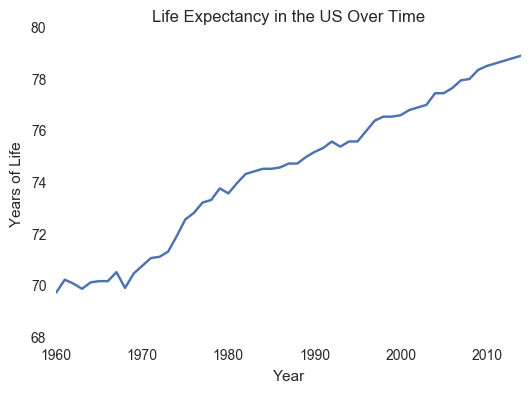

In [111]:
sb.set_style('white')
fig = united_states_life_expectancy.transpose().iloc[4:].plot(legend=None)
plt.xlabel('Year')
plt.ylabel('Years of Life')
plt.title('Life Expectancy in the US Over Time')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['left'].set_visible(False)



Life expectancy for males and females in the United States has decently increased from approximately 70 years of life in 1960 to 79 years of life in 2014. However, the United States has been long regarded as one of the wealthiest nations in the world. It would be interesting to see the effect of wealth and income on life expectancy.

# Life Expectancy Trends Over Time by Income Group

Are there significant differences in the life expectancy trends over time by income groups around the world?

In [127]:
life_expectancy = data[data['Indicator Name'] == 'Life expectancy at birth, total (years)']
incomes = ['High income', 'Middle income', 'Low income']
income_life_expectancy = life_expectancy[life_expectancy['Country Name'].isin(incomes)]

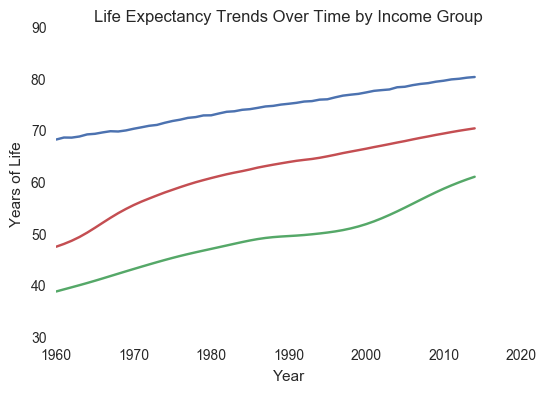

In [162]:
plot_frame = income_life_expectancy.transpose()
plot_frame.drop(['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
plot_frame.columns = plot_frame.iloc[0]
plot_frame = plot_frame[1:]
temp = plot_frame.index.values
plot_frame['years'] = temp

fig, ax = plt.subplots()
ax.plot(plot_frame['years'], plot_frame['High income'])
ax.plot(plot_frame['years'], plot_frame['Low income'])
ax.plot(plot_frame['years'], plot_frame['Middle income'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Year')
plt.ylabel('Years of Life')
plt.title('Life Expectancy Trends Over Time by Income Group')


It appears that life expectancy has been improving for low and middle income groups at a higher rate than high income groups. However in this day, both low and middle income groups are still below the life expectancy of high income groups at 1960. What specific variables are correlated with the rise of life expectancy in low income groups? Have these variables remained consistent with high income groups over time?

# Health Expenditure per Capita Trends Over Time by Income Group

In [205]:
health_expenditure = data_2[data_2['Indicator Name'] == 'Health expenditure per capita (current US$)']
income_health_expenditure = health_expenditure[health_expenditure['Country Name'].isin(incomes)]
income_health_expenditure = income_health_expenditure.dropna(axis=1, how='any')
health_plot_frame = income_health_expenditure.transpose()
health_plot_frame.drop(['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
health_plot_frame.columns = health_plot_frame.iloc[0]
health_plot_frame = health_plot_frame[1:]
temp = health_plot_frame.index.values
health_plot_frame['years'] = temp
health_plot_frame.head()

Country Name,High income,Low income,Middle income,years
1995,2320.54,9.77935,55.3069,1995
1996,2344.94,10.5169,61.7077,1996
1997,2309.77,10.6991,67.9899,1997
1998,2358.58,11.0162,65.6568,1998
1999,2487.75,11.6807,62.3024,1999


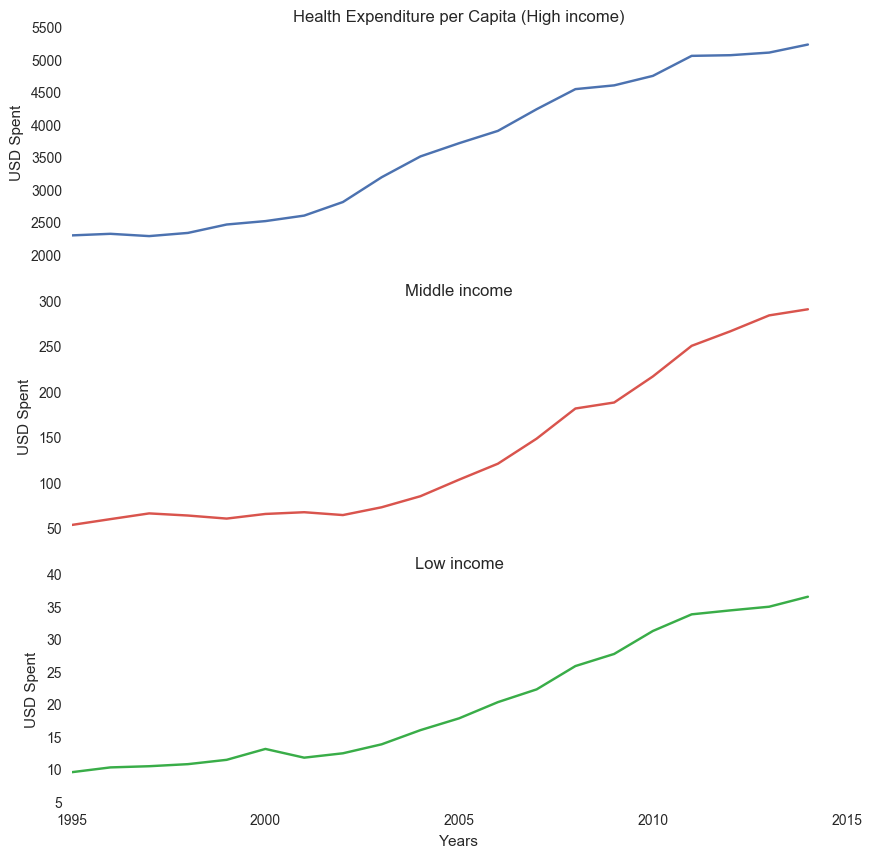

In [248]:
f, ax = plt.subplots(3, sharex=True, figsize=(10,10))

ax[0].plot(health_plot_frame['years'], health_plot_frame['High income'])
ax[0].set_title('Health Expenditure per Capita (High income)')
ax[1].plot(health_plot_frame['years'], health_plot_frame['Middle income'], sb.xkcd_rgb["pale red"])
ax[1].set_title('Middle income')
ax[2].plot(health_plot_frame['years'], health_plot_frame['Low income'], sb.xkcd_rgb["medium green"])
ax[2].set_title('Low income')


for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].set_ylabel('USD Spent')

plt.xlabel('Years')

plt.show()


The dataset only contains health expenditure per capita data starting at 1995. Remarkably, the amount spent per income group are not even remotely close to one another. In 1995 health expenditure per capita on low income groups were around $10, compared to $50 for middle income groups, and $2300 for high income groups. By 2014, each income income groups' expenditure per capita had a high relative increase. What seems particularly interesting about low income groups is that looking back at the life expectancy chart, the slope of the line emits a noticeable increase beginning at the year 1995. It appears that health expenditure and life expectancy may be positively correlated for all income groups. What other variables could be contributing to the increase in life expectancy?

# Improved Water Source Access by Income Group

In [254]:
water_data = data_2[data_2['Indicator Name'] == 'Improved water source (% of population with access)']
income_water = water_data[water_data['Country Name'].isin(incomes)]
income_water = income_water.dropna(axis=1, how='any')
water_plot_frame = income_water.transpose()
water_plot_frame.drop(['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
water_plot_frame.columns = water_plot_frame.iloc[0]
water_plot_frame = water_plot_frame[1:]
temp = water_plot_frame.index.values
water_plot_frame['years'] = temp
water_plot_frame.head()

Country Name,High income,Low income,Middle income,years
1990,98.7533,46.5018,72.8718,1990
1991,98.3581,45.9348,73.7463,1991
1992,98.4115,46.374,74.6827,1992
1993,98.4473,46.5864,75.5203,1993
1994,98.5054,47.3773,76.6095,1994


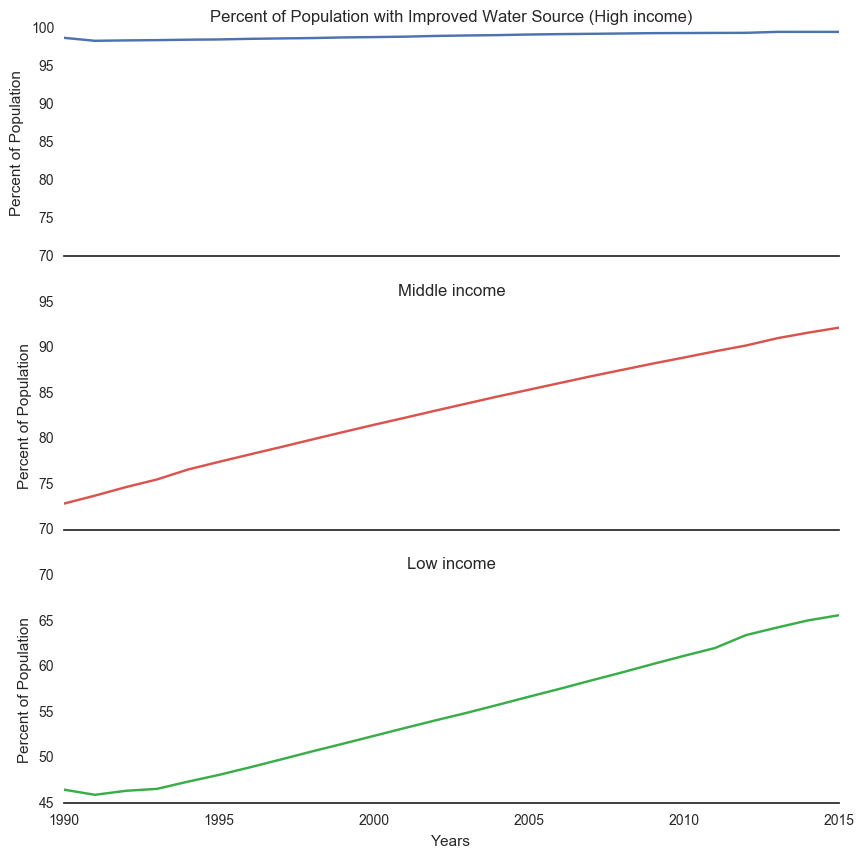

In [257]:
f, ax = plt.subplots(3, sharex=True, figsize=(10,10))

ax[0].plot(water_plot_frame['years'], water_plot_frame['High income'])
ax[0].set_title('Percent of Population with Improved Water Source (High income)')
ax[0].set_ylim([70,100])
ax[1].plot(water_plot_frame['years'], water_plot_frame['Middle income'], sb.xkcd_rgb["pale red"])
ax[1].set_title('Middle income')
ax[2].plot(water_plot_frame['years'], water_plot_frame['Low income'], sb.xkcd_rgb["medium green"])
ax[2].set_title('Low income')


for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_ylabel('Percent of Population')

plt.xlabel('Years')

plt.show()

This dataset only contains improved water source data from 1990 to 2015. It appears that high income groups have virtually had high quality sources for water the entire time from 1990 to 2015. Access to improved water sources for middle income groups have increased to over 90 percent of the population having access in 2015. For lower income groups in 1990 less than half of the population had access to improved water sources, but in 2015 it increased to about 65 percent of the population having access. Access to improved water sources also appears to be positively correlated with life expectancy fow middle and low income groups.

# Improved Sanitation Facilities Access By Income Group

In [258]:
sanitation_data = data_2[data_2['Indicator Name'] == 'Improved sanitation facilities (% of population with access)']
income_sanitation = sanitation_data[sanitation_data['Country Name'].isin(incomes)]
income_sanitation = income_sanitation.dropna(axis=1, how='any')
sanitation_plot_frame = income_sanitation.transpose()
sanitation_plot_frame.drop(['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True)
sanitation_plot_frame.columns = sanitation_plot_frame.iloc[0]
sanitation_plot_frame = sanitation_plot_frame[1:]
temp = sanitation_plot_frame.index.values
sanitation_plot_frame['years'] = temp
sanitation_plot_frame.head()

Country Name,High income,Low income,Middle income,years
1990,98.7684,13.1552,44.5201,1990
1991,98.7835,13.7181,45.3262,1991
1992,98.8348,16.6255,46.14,1992
1993,98.8634,16.9126,46.9425,1993
1994,98.8887,17.1155,48.3872,1994


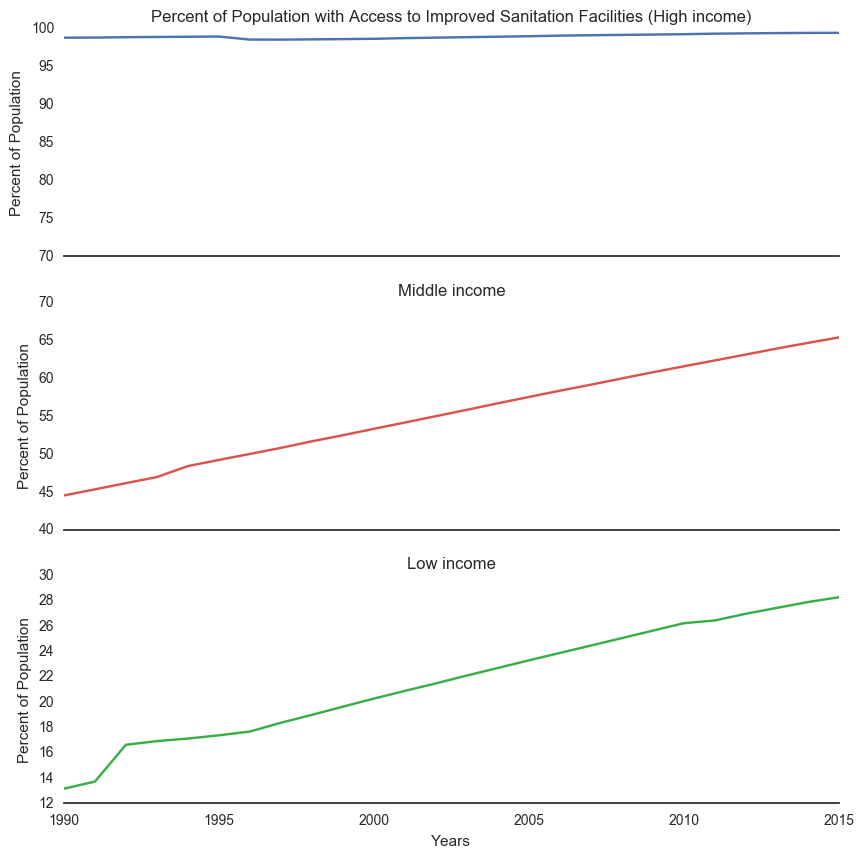

In [260]:
f, ax = plt.subplots(3, sharex=True, figsize=(10,10))

ax[0].plot(sanitation_plot_frame['years'], sanitation_plot_frame['High income'])
ax[0].set_title('Percent of Population with Access to Improved Sanitation Facilities (High income)')
ax[0].set_ylim([70,100])
ax[1].plot(sanitation_plot_frame['years'], sanitation_plot_frame['Middle income'], sb.xkcd_rgb["pale red"])
ax[1].set_title('Middle income')
ax[2].plot(sanitation_plot_frame['years'], sanitation_plot_frame['Low income'], sb.xkcd_rgb["medium green"])
ax[2].set_title('Low income')


for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_ylabel('Percent of Population')

plt.xlabel('Years')

plt.show()

This dataset only contains improved water source data from 1990 to 2015. Similarly with access to improved water source, it appears that high income groups have also had access to high quality sanitation facilities from 1990 to 2015. Access to improved sanitation facilities for middle income groups have increased from less than half of the population having access in 1990 to about 65 percent of the population having access. For lower income groups in 1990 a miniscule 13 percent of the population had access to improved sanitation facilities. In 2015, less than 30 percent of the population have access to the facilities, still very low. Access to improved sanitation facilities also appears to be positively correlated with life expectancy fow middle and low income groups.

# Conclusion and Future Questions

Life expectancy for all income groups have improved significantly since 1965. For high income groups the main driver behind that appears to be more financial investment in health. However for low and middle income groups, several variables could be contributing to the higher life expectancy including health expenditure per capita, access to improved water sources, and access to improved sanitation facilities. 

There are still many more questions to explore that might require an additional dataset to answer. Some questions could be:

What other variables are improving the life expectancy of high income groups?
What has contributed to the remarkable improvement of variables affecting lower and middle income groups?
What other opportunities are there to improve upon to continue to close the life expectancy gap between income groups?